In [55]:
using Logging
using BenchmarkTools
include("driver.jl")
include("visual.jl")

Logging.disable_logging(Logging.Warn);

Plots.AnimatedGif("C:\\Users\\ryara\\AppData\\Local\\Temp\\jl_VSzCR2NGFS.gif")
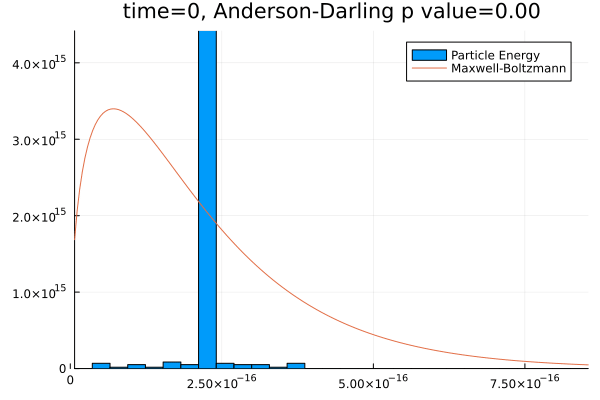

In [56]:
#Test 1 - Simple Argon Gas
L = (1.e-6, 1.e-6, 1.e-6)
Ncell = (20, 1, 1)
sys = System(L, Ncell, argon, 1.78, 2000, 400.)
samp = simulate_dsmc(sys=sys, Nsteps=2000, Nsample=100)
display(plot_thermalization(samp))

In [57]:
#Test 2 - Simple Argon Gas Runtime
L = (1.e-6, 1.e-6, 1.e-6)
Ncell = (20, 1, 1)

#run first time to compile
sys = System(L, Ncell, argon, 1.78, 2000, 400.)
samp = simulate_dsmc(sys=sys, Nsteps=2000, Nsample=100)

@benchmark begin 
    sys = System($L, $Ncell, $argon, 1.78, 2000, 400.)
    samp = simulate_dsmc(sys=sys, Nsteps=2000, Nsample=100)
end

BenchmarkTools.Trial: 21 samples with 1 evaluation.
 Range (min … max):  236.510 ms … 254.689 ms  ┊ GC (min … max): 0.00% … 2.19%
 Time  (median):     243.744 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   244.540 ms ±   4.784 ms  ┊ GC (mean ± σ):  0.67% ± 0.96%

  ▁   ▁     ▁▁    ▁█▁ ▁ ▁ ▁▁▁    ▁▁      ▁ ▁▁     ▁   ▁       ▁  
  █▁▁▁█▁▁▁▁▁██▁▁▁▁███▁█▁█▁███▁▁▁▁██▁▁▁▁▁▁█▁██▁▁▁▁▁█▁▁▁█▁▁▁▁▁▁▁█ ▁
  237 ms           Histogram: frequency by time          255 ms <

 Memory estimate: 25.22 MiB, allocs estimate: 280830.